Sec A: [13 17 23 29 29 33 37 38 39 43 47 47 49 49 53 57 58 61 63 69 71 73 81]
Sec B: [14 17 18 20 21 22 33 37 39 42 45 47 49 53 58 62 64 67 73 81 84 85 93]
A sec: 25th percentile:  35.0
A sec: Median:  47.0
A sec: 75th percentile:  59.5
B sec: 25th percentile:  27.5
B sec: Median:  47.0
B sec: 75th percentile:  65.5


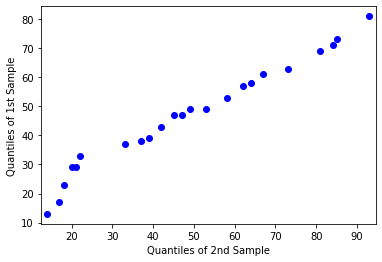

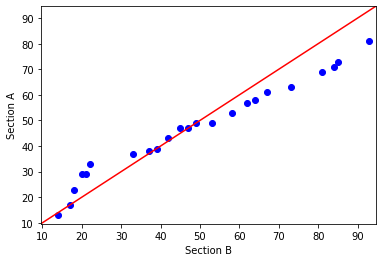

In [17]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples

x_secA = np.array([47, 63, 71, 39, 47, 49, 43, 37, 81, 69, 38, 13, 29, 61, 49, 53, 57, 23, 58, 17, 73, 33, 29])
y_secB = np.array([20, 49, 85, 17, 33, 62, 93, 64, 37, 81, 22, 18, 45, 42, 14, 39, 67, 47, 53, 73, 58, 84, 21])
print('Sec A:', np.sort(x_secA))
print('Sec B:', np.sort(y_secB))
print("A sec: 25th percentile: ", np.percentile(x_secA, 25))
print("A sec: Median: ", np.median(x_secA))
print("A sec: 75th percentile: ", np.percentile(x_secA, 75))

print("B sec: 25th percentile: ", np.percentile(y_secB, 25))
print("B sec: Median: ", np.median(y_secB))
print("B sec: 75th percentile: ", np.percentile(y_secB, 75))
pp_x = sm.ProbPlot(x_secA)
pp_y = sm.ProbPlot(y_secB)
qqplot_2samples(pp_x, pp_y)


# compare x quantiles to y quantiles
fig3 = pp_x.qqplot(other=pp_y, line='45', xlabel='Section B', ylabel='Section A')
plt.show()

#section B is doing better


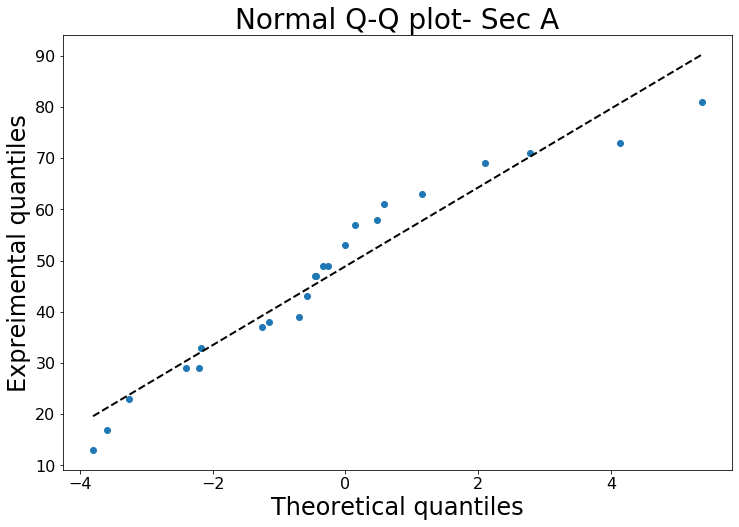

In [9]:
#1b
import numpy as np
import numpy.random as random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data=np.array([47, 63, 71, 39, 47, 49, 43, 37, 81, 69, 38, 13, 29, 61, 49, 53, 57, 23, 58, 17, 73, 33, 29])
data = np.sort(data)
norm=random.normal(0,2,len(data))
norm.sort()
plt.figure(figsize=(12,8),facecolor='1.0') 

plt.plot(norm,data,"o")

#generate a trend line as in http://widu.tumblr.com/post/43624347354/matplotlib-trendline
z = np.polyfit(norm,data, 1)
p = np.poly1d(z)
plt.plot(norm,p(norm),"k--", linewidth=2)
plt.title("Normal Q-Q plot- Sec A", size=28)
plt.xlabel("Theoretical quantiles", size=24)
plt.ylabel("Expreimental quantiles", size=24)
plt.tick_params(labelsize=16)
plt.show()

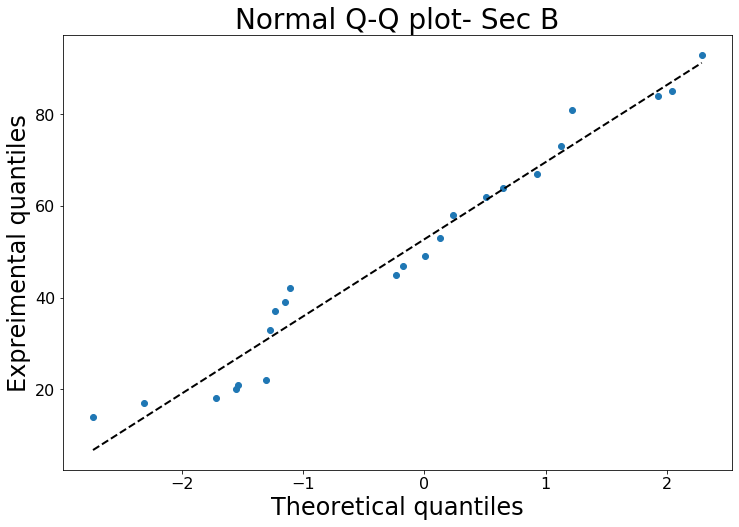

In [11]:
import numpy as np
import numpy.random as random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data=np.array([20, 49, 85, 17, 33, 62, 93, 64, 37, 81, 22, 18, 45, 42, 14, 39, 67, 47, 53, 73, 58, 84, 21])
data = np.sort(data)
norm=random.normal(0,2,len(data))
norm.sort()
plt.figure(figsize=(12,8),facecolor='1.0') 

plt.plot(norm,data,"o")

#generate a trend line as in http://widu.tumblr.com/post/43624347354/matplotlib-trendline
z = np.polyfit(norm,data, 1)
p = np.poly1d(z)
plt.plot(norm,p(norm),"k--", linewidth=2)
plt.title("Normal Q-Q plot- Sec B", size=28)
plt.xlabel("Theoretical quantiles", size=24)
plt.ylabel("Expreimental quantiles", size=24)
plt.tick_params(labelsize=16)
plt.show()

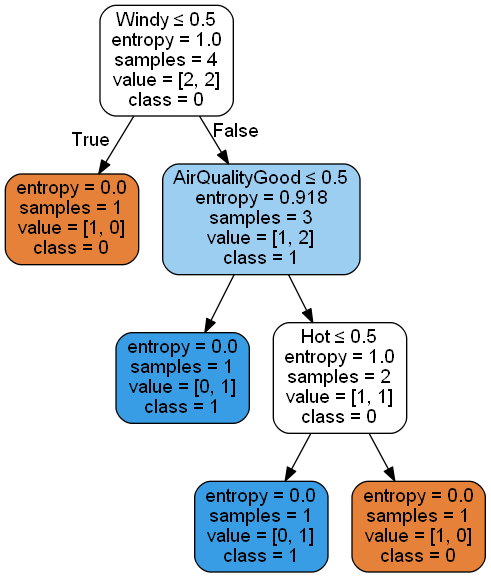

In [8]:
#4
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import accuracy_score #Import scikit-learn metrics module for accuracy calculation
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


col_names = ['Windy', 'AirQualityGood', 'Hot', 'PlayTennis']
# load dataset
data = pd.read_csv("C:/Users/subar/Downloads/CMPE-255 Sec 99 - Data Mining/Home Works/HW2_Submission/Tennis.csv")
data['Windy'] = np.where(data['Windy'] == 'Yes', 1, 0)
data['AirQualityGood'] = np.where(data['AirQualityGood'] == 'Yes', 1, 0)
data['Hot'] = np.where(data['Hot'] == 'Yes', 1, 0)
data['PlayTennis'] = np.where(data['PlayTennis'] == 'Yes', 1, 0)

#split dataset in features and target variable
feature_cols = ['AirQualityGood','Windy', 'Hot']
X = data[feature_cols] # Features
y = data.PlayTennis # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X,y)

'''
# without using training and test data 
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))
'''


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Playtennis_DecisionTree.png')
Image(graph.create_png())

In [4]:
#3b - Naive Bayes
import csv
import random
import math
import pandas as pd
import numpy as np


def loadCsv(filename):
    lines = csv.reader(open(filename, "r"))
    dataset = list(lines)
    dataset.pop(0)
    #print(dataset)
    #print(len(dataset))
    for i in range(len(dataset)):
        if(dataset[i][11]  == 'malignant'): dataset[i][11] = '1'
        elif dataset[i][11] == 'benign': dataset[i][11] = '0'

    for i in range(len(dataset)):
        if(dataset[i][11]  == 'malignant'): dataset[i][11] = '1'
        elif dataset[i][11] == 'benign': dataset[i][11] = '0'

    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]]

    x_train = []
    for j in range(len(dataset)):
        column = []
        for i in range(10):
            column.append(0)
        x_train.append(column)
        
# taking only required columns, dropping ID column
    for i in range(len(dataset)):
        for j in range(10):
            x_train[i][j] = dataset[i][j+2]
    #print(x_train)
    #print(dataset)
    #print(dataset)
    return x_train


def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]


def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated


def mean(numbers):
    return sum(numbers) / float(len(numbers))


def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x - avg, 2) for x in numbers]) / float(len(numbers) - 1)
    return math.sqrt(variance)


def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries


def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries


def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev, 2))))
    return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent


def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities


def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel


def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions


def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if testSet[i][-1] == predictions[i]:
            correct += 1
    return (correct / float(len(testSet))) * 100.0


def main():
    filename = 'C:/Users/subar/Downloads/CMPE-255 Sec 99 - Data Mining/Home Works/MyData.csv'
    splitRatio = 0.7
    dataset = loadCsv(filename)
    trainingSet, testSet = splitDataset(dataset, splitRatio)
    print("Split {0} rows into train={1} and test={2} rows".format(len(dataset), len(trainingSet), len(testSet)))

    # prepare model
    summaries = summarizeByClass(trainingSet)
    # test model
    predictions = getPredictions(summaries, testSet)
    
    #accuracy test
    accuracy = getAccuracy(testSet, predictions)
    print("Accuracy: {0}%".format(accuracy))

main()

Split 683 rows into train=478 and test=205 rows
Accuracy: 96.09756097560975%


In [1]:
#5b

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# reading csv file
data = pd.read_csv("C:/Users/subar/Downloads/CMPE-255 Sec 99 - Data Mining/Home Works/MyData.csv")

# remove id column
data = data.drop('Id', 1)
print(data)

# convert to numeric
for x in range(2, 10):
    data.iloc[:, x] = pd.to_numeric(data.iloc[:, x])

# Change Y values to 1's and 0's
data['Class'] = np.where(data['Class'] == 'malignant', 1, 0)
data['Class'] = data['Class'].astype('category')
print(data)

# Prep Training and Test data.
trainData, testData = train_test_split(data, train_size=0.7, random_state=100)
print('Total data count:', len(data))
print('Training data count:',len(trainData))
print('Test data count:',len(testData))


# Class distribution of train data
print('Class distribution of training data:',data.Class.value_counts())
#print(trainData.groupby('Class').size())

# Separate majority and minority classes
trainData_majority = trainData[trainData.Class == 0]
trainData_minority = trainData[trainData.Class == 1]

# Downsample majority class
trainData_downsampled = resample(trainData_majority,
                                 replace=False,     # sample without replacement
                                 n_samples=164,     # to match minority class
                                 random_state=100)  # reproducible results

# Combine minority class with downsampled majority class
down_train = pd.concat([trainData_downsampled, trainData_minority])
#print(down_train.groupby('Class').size())
# Display new class counts
#print('downsample', down_train.Class.value_counts())


# Build Logistic Model with down sampled data
X_traindown = down_train[['Cl.thickness' , 'Cell.size' , 'Cell.shape']]
Y_traindown = down_train.Class
#print(down_train)
X_testdown = testData[['Cl.thickness' , 'Cell.size' , 'Cell.shape']]
Y_testdown = testData.Class

svc_model = SVC()
svc_model.fit(X_traindown,Y_traindown)
predictionsDown = svc_model.predict(X_testdown)

# Accuracy calculation
print('Accuracy with down sampled data:',(accuracy_score(Y_testdown, predictionsDown) * 100) ,"%")
print('Classification:', classification_report(Y_testdown, predictionsDown))

# Print support vectors
print("Support Vectors:", svc_model.support_vectors_)

# Print indices of support vectors
print("Indices of Support Vectors:", svc_model.support_)

# Print number of support vectors for each class
print("Number of support vectors for each class:", svc_model.n_support_)

     Unnamed: 0  Cl.thickness  Cell.size  Cell.shape  Marg.adhesion  \
0             1             5          1           1              1   
1             2             5          4           4              5   
2             3             3          1           1              1   
3             4             6          8           8              1   
4             5             4          1           1              3   
..          ...           ...        ...         ...            ...   
678         695             3          1           1              1   
679         696             2          1           1              1   
680         697             5         10          10              3   
681         698             4          8           6              4   
682         699             4          8           8              5   

     Epith.c.size  Bare.nuclei  Bl.cromatin  Normal.nucleoli  Mitoses  \
0               2            1            3                1        1   
1

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# reading csv file
data = pd.read_csv("C:/Users/subar/Downloads/CMPE-255 Sec 99 - Data Mining/Home Works/\HW2_Submission/adult_census_income.csv")

print(data)

# iterating the columns
for col in data.columns:
    print(col)
'''
# convert to numeric
for x in range(0, 13):
    data.iloc[:, x] = pd.to_numeric(data.iloc[:, x])
'''

# Change Y values to 1's and 0's
data['income'] = np.where(data['income'] == '>50K', 1, 0)
data['income'] = data['income'].astype('int64')
print(data)

numAttributes = data.select_dtypes(include=['int64'])
print('Number valued columns:', numAttributes.columns)
data = data.select_dtypes(include=['int64'])

# Histogram visualization of data
data.hist(figsize=(10,10))

# Train data details
print('Describe data:', data)


# Prep Training and Test data.
trainData, testData = train_test_split(data, train_size=0.7, random_state=100)
print(trainData.info())
print('Total data count:', len(data))
print('Training data count:',len(trainData))
print('Test data count:',len(testData))


# Class distribution of train data
print('Class distribution of training data:',trainData.income.value_counts())

# Separate majority and minority classes
trainData_majority = trainData[trainData.income == 0]
trainData_minority = trainData[trainData.income == 1]

# Downsample majority class
trainData_downsampled = resample(trainData_majority,
                                 replace=False,     # sample without replacement
                                 n_samples=len(trainData_minority),     # to match minority class
                                 random_state=100)  # reproducible results

# Combine minority class with downsampled majority class
down_train = pd.concat([trainData_downsampled, trainData_minority])


# Build Logistic Model with down sampled data
X_traindown = down_train.loc[:, down_train.columns != 'income']
Y_traindown = down_train.income
#print(down_train)
X_testdown = testData.loc[:, testData.columns != 'income']
Y_testdown = testData.income
Downlogmodel = LogisticRegression()
Downlogmodel.fit(X_traindown,Y_traindown)
predictionsDown = Downlogmodel.predict(X_testdown)

# Accuracy calculation
print('Accuracy with down sampled data:',(accuracy_score(Y_testdown, predictionsDown) * 100) ,"%")

cfm = confusion_matrix(predictionsDown, Y_testdown.values)
sns.heatmap(cfm, annot=True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')


       age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   

Text(0, 0.5, 'Actual classes')

In [6]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import  cross_val_score,train_test_split # Import train_test_split function
from sklearn.metrics import confusion_matrix,accuracy_score #Import scikit-learn metrics module for accuracy calculation
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


col_names = ['Windy', 'AirQualityGood', 'Hot', 'PlayTennis']
# load dataset
# reading csv file
data = pd.read_csv("C:/Users/subar/Downloads/CMPE-255 Sec 99 - Data Mining/Home Works/\HW2_Submission/adult_census_income.csv")
#print(data)


# Change Y values to 1's and 0's
data['income'] = np.where(data['income'] == '>50K', 1, 0)
data['income'] = data['income'].astype('int64')
print(data)

#split dataset in features and target variable
feature_cols =  ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
#X = data.select_dtypes(include=['int64']) # Features
X = data[feature_cols]
y = data.income # Target variable
print(X.columns)

print("feature columns:", feature_cols)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy" , max_depth=3) # , max_depth=5; criterion="entropy"/"gini"

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy,
print("Accuracy:",(accuracy_score(y_test, y_pred)* 100) ,"%")

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('adult_census_income.png')
Image(graph.create_png())

#confusion matrix
cfm = confusion_matrix( y_test, y_pred)
print("Confusion Matrix", cfm)
plt.show()
sns.heatmap(cfm, annot=True) #annot=True to annotate cells
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
plt.show()

#in depth calculation

for max_depth in range(1, 20):
    t = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    scores = cross_val_score(t, X, y, cv=5)
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std()*2))

       age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   

<Figure size 640x480 with 2 Axes>

Max depth: 1, Accuracy: 0.76 (+/- 0.00)
Max depth: 2, Accuracy: 0.76 (+/- 0.01)
Max depth: 3, Accuracy: 0.76 (+/- 0.03)
Max depth: 4, Accuracy: 0.76 (+/- 0.00)
Max depth: 5, Accuracy: 0.77 (+/- 0.05)
Max depth: 6, Accuracy: 0.77 (+/- 0.03)
Max depth: 7, Accuracy: 0.77 (+/- 0.03)
Max depth: 8, Accuracy: 0.77 (+/- 0.03)
Max depth: 9, Accuracy: 0.77 (+/- 0.03)
Max depth: 10, Accuracy: 0.77 (+/- 0.03)
Max depth: 11, Accuracy: 0.77 (+/- 0.03)
Max depth: 12, Accuracy: 0.77 (+/- 0.03)
Max depth: 13, Accuracy: 0.77 (+/- 0.03)
Max depth: 14, Accuracy: 0.77 (+/- 0.04)
Max depth: 15, Accuracy: 0.76 (+/- 0.03)
Max depth: 16, Accuracy: 0.76 (+/- 0.04)
Max depth: 17, Accuracy: 0.76 (+/- 0.04)
Max depth: 18, Accuracy: 0.75 (+/- 0.04)
Max depth: 19, Accuracy: 0.75 (+/- 0.04)
